In [47]:
#import ibraries 
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Setup Complete")

Setup Complete


In [48]:
sales_data = pd.read_csv('/kaggle/input/sales-forecasting/train.csv',index_col='Row ID')
sales_data.sample(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
5797,CA-2015-124856,29/09/2015,03/10/2015,Second Class,LD-17005,Lisa DeCherney,Consumer,United States,New York City,New York,10011.0,East,FUR-FU-10000521,Furniture,Furnishings,"Seth Thomas 14"" Putty-Colored Wall Clock",117.360
7959,CA-2018-131807,05/10/2018,10/10/2018,Standard Class,GG-14650,Greg Guthrie,Corporate,United States,Chico,California,95928.0,West,FUR-FU-10004666,Furniture,Furnishings,DAX Clear Channel Poster Frame,72.900
9242,CA-2018-110310,27/10/2018,02/11/2018,Standard Class,NB-18655,Nona Balk,Corporate,United States,Tallahassee,Florida,32303.0,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,6.576
3697,CA-2017-142097,15/10/2017,20/10/2017,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Springfield,Virginia,22153.0,South,OFF-AP-10000696,Office Supplies,Appliances,Holmes Odor Grabber,43.260


In [49]:
sales_data_copy=sales_data.copy()
sales_data_copy.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [50]:
sales_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [51]:
sales_data_copy['Order Date']=pd.to_datetime(sales_data_copy['Order Date'])
sales_data_copy['Ship Date']=pd.to_datetime(sales_data_copy['Ship Date'])
sales_data_copy['Postal Code']=sales_data_copy['Postal Code'].astype("object", errors='ignore')

In [52]:
sales_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   object        
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [53]:
sales_data_copy.dropna(inplace=True)

In [54]:
sales_data_copy.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [55]:
sales_data_copy.shape

(9789, 17)

In [56]:
pd.DataFrame(round(sales_data_copy['Sales'].describe(),2))

,Sales
count,9789.00
mean,230.12
std,625.30
min,0.44
25%,17.25
50%,54.38
75%,210.39
max,22638.48


<AxesSubplot:xlabel='Sales', ylabel='Count'>

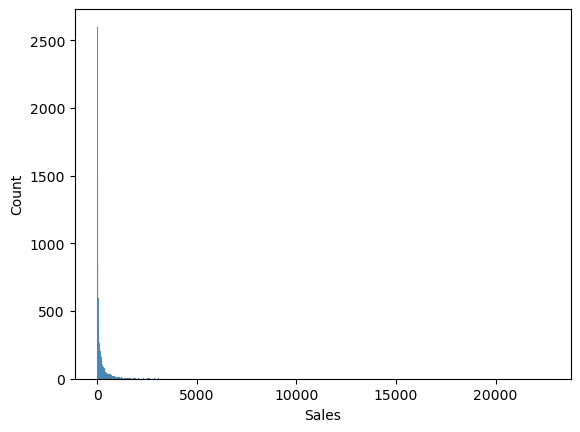

In [57]:
sns.histplot(sales_data_copy['Sales'])

# Data manipulation

In [58]:
sales_data_copy['Order Day'] = sales_data_copy['Order Date'].dt.day
sales_data_copy['Ship Day'] = sales_data_copy['Ship Date'].dt.day
sales_data_copy['Order month'] = sales_data_copy['Order Date'].dt.month
sales_data_copy['Ship month'] = sales_data_copy['Ship Date'].dt.month
sales_data_copy['Order Year'] = sales_data_copy['Order Date'].dt.year
sales_data_copy['Ship Year'] = sales_data_copy['Order Date'].dt.year
sales_data_copy['No of Days']=(sales_data_copy['Ship Date'] - sales_data_copy['Order Date']).dt.days

In [59]:
sales_data_copy.sample(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Order Day,Ship Day,Order month,Ship month,Order Year,Ship Year,No of Days
Row ID,,,,,,,,,,,,,,,,,,,,,
2104,CA-2018-167101,2018-03-24,2018-03-28,Second Class,BM-11650,Brian Moss,Corporate,United States,New York City,New York,...,Paper,Xerox 1888,221.92,24,28,3,3,2018,2018,4
7141,CA-2018-128783,2018-07-09,2018-07-09,Same Day,TG-21640,Trudy Glocke,Consumer,United States,Saint Charles,Missouri,...,Accessories,Maxell 4.7GB DVD-R,113.52,9,9,7,7,2018,2018,0
6782,US-2017-147711,2017-03-09,2017-08-09,Second Class,HF-14995,Herbert Flentye,Consumer,United States,Baltimore,Maryland,...,Labels,Avery 486,58.48,9,9,3,8,2017,2017,153
8375,CA-2016-158701,2016-05-01,2016-10-01,Standard Class,JL-15175,James Lanier,Home Office,United States,San Francisco,California,...,Appliances,Acco 6 Outlet Guardian Premium Surge Suppressor,87.36,1,1,5,10,2016,2016,153


In [60]:
sales_data_copy['Order ID'].value_counts()

CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2015-161613     1
CA-2018-101728     1
CA-2017-112942     1
CA-2018-126438     1
CA-2017-147123     1
Name: Order ID, Length: 4916, dtype: int64

In [61]:
#Best months with sales over 130,000
Months_sales=pd.DataFrame(sales_data_copy.groupby('Order month')['Sales'].sum()).sort_values(by='Sales',ascending=False)
Months_sales

,Sales
Order month,
11,268768.7885
12,246266.5152
9,245155.0671
3,212256.1344
8,203196.8939
10,183851.9562
5,165795.7167
7,158757.3865
1,153681.4254


[(130000.0, 282207.227925)]

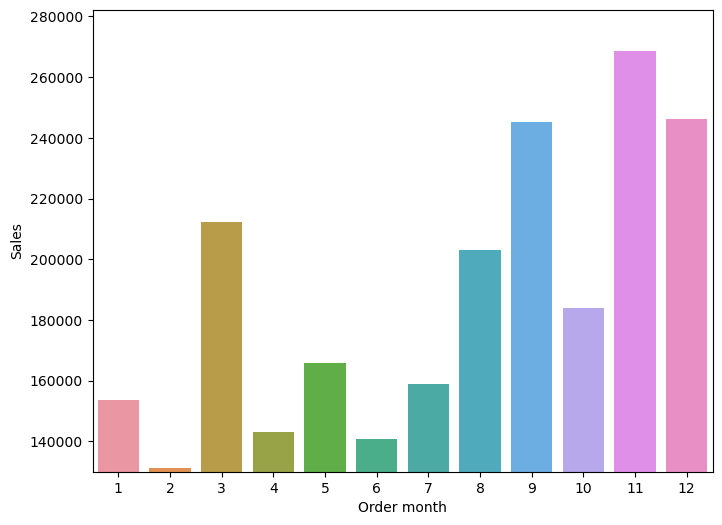

In [62]:
plt.figure(figsize=(8,6))
best_months=sns.barplot(x=Months_sales.index,y='Sales', data=Months_sales)
best_months.set(ylim=(130000, None))

In [63]:
pd.DataFrame(sales_data_copy['Ship month'].value_counts().sort_values(ascending=False))

,Ship month
11,1199
9,1158
12,1130
8,801
6,780
10,773
7,757
5,754
3,721
4,684


<AxesSubplot:xlabel='Ship month', ylabel='count'>

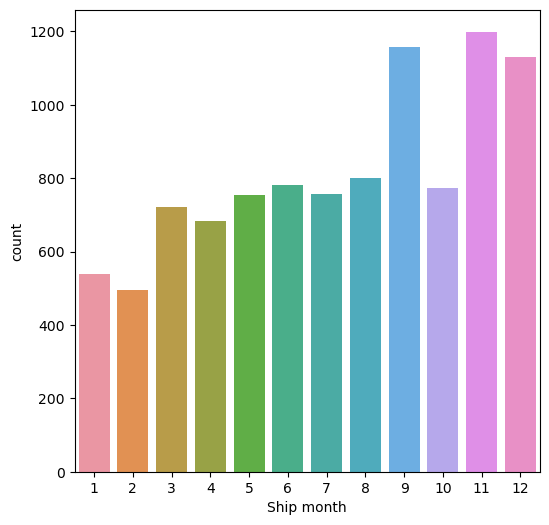

In [64]:
plt.figure(figsize=(6,6))
sns.countplot(x='Ship month', data=sales_data_copy)

In [65]:
sales_data_copy.sample(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Order Day,Ship Day,Order month,Ship month,Order Year,Ship Year,No of Days
Row ID,,,,,,,,,,,,,,,,,,,,,
934,CA-2017-140081,2017-06-20,2017-06-24,Standard Class,CG-12040,Catherine Glotzbach,Home Office,United States,Philadelphia,Pennsylvania,...,Paper,"Wirebound Message Books, 2 7/8"" x 5"", 3 Forms ...",45.056,20,24,6,6,2017,2017,4


In [66]:
pd.DataFrame(sales_data_copy['Ship Mode'].value_counts().sort_values(ascending=False))

,Ship Mode
Standard Class,5849
Second Class,1901
First Class,1501
Same Day,538


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

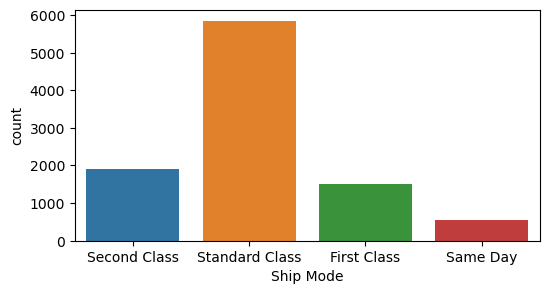

In [67]:
plt.figure(figsize=(6,3))
sns.countplot(x='Ship Mode', data=sales_data_copy)

In [68]:
#Best Customers with sales over 10,000
Customers=pd.DataFrame(sales_data_copy.groupby('Customer Name')['Sales'].sum()).sort_values(by='Sales',ascending=False)
best_customers=Customers[Customers['Sales']>=10000]
best_customers

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [89]:
#Best Segment with sales over 10,000
Best_Segments=pd.DataFrame(sales_data_copy.groupby('Segment')['Sales'].sum()).sort_values(by='Sales',ascending=False)
Best_Segments

,Sales
Segment,
Consumer,1.146708e+06
Corporate,6.822118e+05
Home Office,4.236874e+05


<AxesSubplot:xlabel='Segment', ylabel='Sales'>

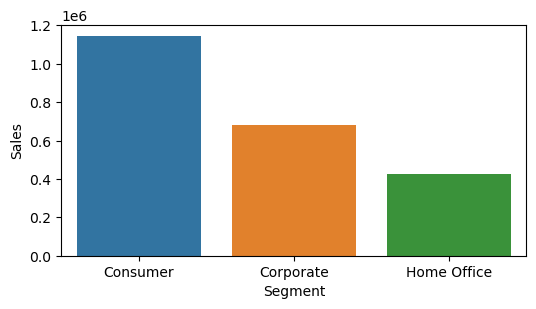

In [91]:
plt.figure(figsize=(6,3))
sns.barplot(x=Best_Segments.index,y='Sales', data=Best_Segments)

In [71]:
#Best Cities with sales over 100,000$
Cities=pd.DataFrame(sales_data_copy.groupby('City')['Sales'].sum()).sort_values(by='Sales',ascending=False)
best_cities=Cities[Cities['Sales']>=100000]
best_cities

,Sales
City,
New York City,252462.547
Los Angeles,173420.181
Seattle,116106.322
San Francisco,109041.120
Philadelphia,108841.749


<AxesSubplot:xlabel='City', ylabel='Sales'>

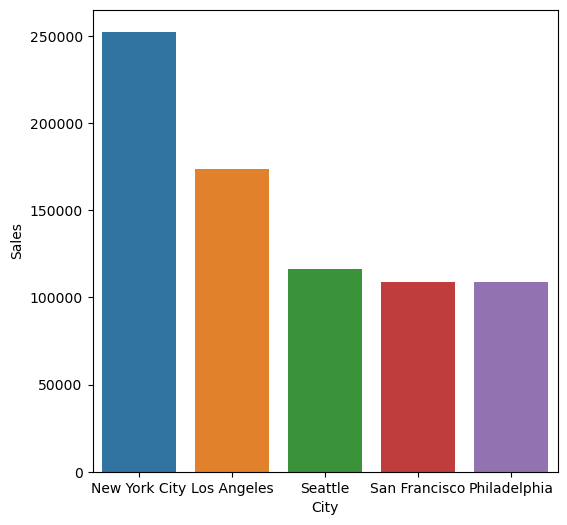

In [72]:
plt.figure(figsize=(6,6))
sns.barplot(x=best_cities.index,y='Sales', data=best_cities)

In [73]:
#Best States with sales over 100,000$
States=pd.DataFrame(sales_data_copy.groupby('State')['Sales'].sum()).sort_values(by='Sales',ascending=False)
best_states=States[States['Sales']>=100000]
best_states

,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500


<AxesSubplot:xlabel='State', ylabel='Sales'>

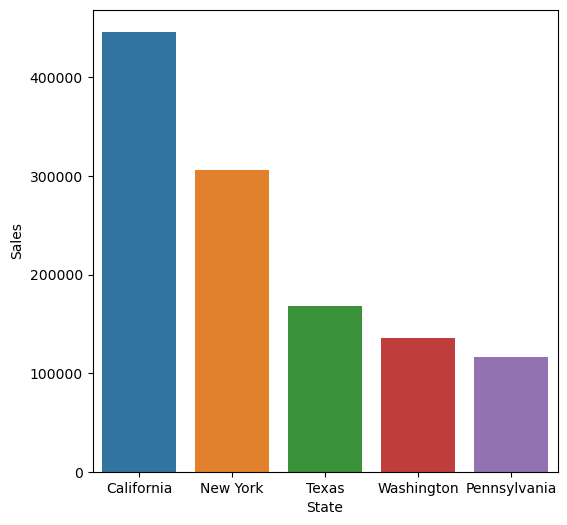

In [74]:

plt.figure(figsize=(6,6))
sns.barplot(x=best_states.index,y='Sales', data=best_states)

In [75]:
sales_data_copy.sample(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Sub-Category,Product Name,Sales,Order Day,Ship Day,Order month,Ship month,Order Year,Ship Year,No of Days
Row ID,,,,,,,,,,,,,,,,,,,,,
400,CA-2017-108987,2017-08-09,2017-10-09,Second Class,AG-10675,Anna Gayman,Consumer,United States,Houston,Texas,...,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",2396.2656,9,9,8,10,2017,2017,61


In [76]:
#Best Categories with sales over 100,000$
Categories=pd.DataFrame(sales_data_copy.groupby('Category')['Sales'].sum()).sort_values(by='Sales',ascending=False)
best_Categories=Categories[Categories['Sales']>=100000]
best_Categories

,Sales
Category,
Technology,825856.1130
Furniture,723538.4757
Office Supplies,703212.8240


<AxesSubplot:xlabel='Category', ylabel='Sales'>

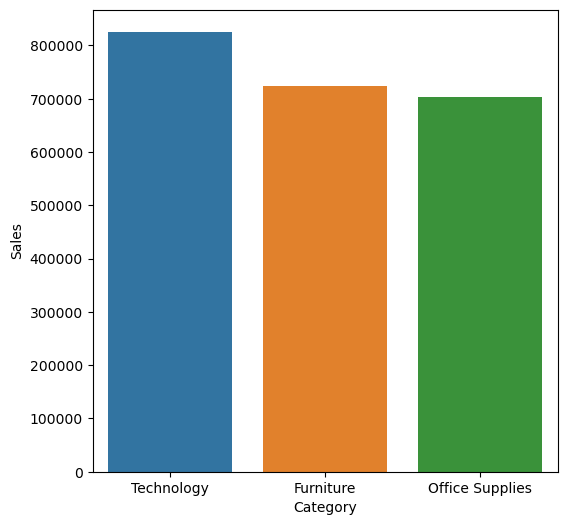

In [77]:
plt.figure(figsize=(6,6))
sns.barplot(x=best_Categories.index,y='Sales', data=best_Categories)

In [78]:
#Best Sub_Categories with sales over 100,000$
Sub_Categories=pd.DataFrame(sales_data_copy.groupby('Sub-Category')['Sales'].sum()).sort_values(by='Sales',ascending=False)
best_Sub_Categories=Sub_Categories[Sub_Categories['Sales']>=200000]
best_Sub_Categories

,Sales
Sub-Category,
Phones,326487.698
Chairs,322107.531
Storage,217779.102
Tables,202810.628
Binders,200028.785


<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

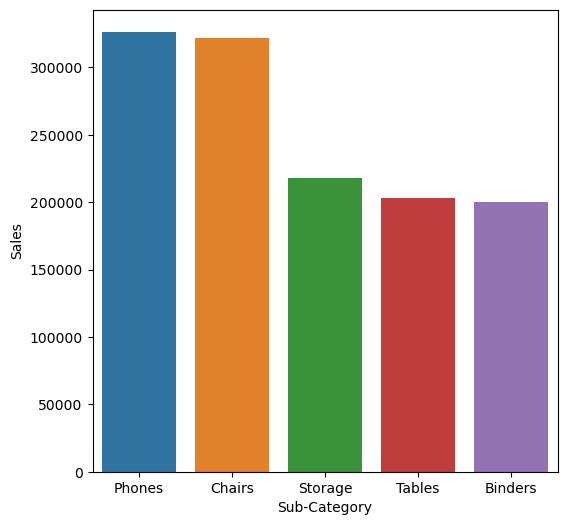

In [79]:
plt.figure(figsize=(6,6))
sns.barplot(x=best_Sub_Categories.index,y='Sales', data=best_Sub_Categories)